In [1]:
import dctkit as dt
from dctkit import config
import os
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from dctkit.mesh.simplex import SimplicialComplex
from dctkit.dec import cochain as C
from dctkit.dec.vector import flat_PDP as flat
from matplotlib import cm
import pysindy as ps

In [2]:
x_max = 5
t_max = 2
dx = 0.05
dt = 0.005
num_x_points = int(x_max/dx)
num_t_points = int(t_max/dt)
x = np.linspace(0, x_max, num_x_points)
t = np.linspace(0, t_max, num_t_points)

# boundary and initial conditions
u_0 = 2 * np.exp(-2 * (x - 0.5 * x_max)**2)

# viscosity coefficient
epsilon = 0.1

In [3]:
# FDM run
def FDM_run(u, epsilon, scheme="parabolic"):
    for t in range(num_t_points - 1):
        diffusion = epsilon * (u[2:, t] - 2 * u[1:-1, t] + u[:-2, t]) / dx**2
        if scheme == "parabolic":
            flux = (u[2:, t]**2 - u[:-2, t]**2) / (4*dx)
        elif scheme == "upwind":
            flux = (u[1:-1, t]**2 - u[:-2, t]**2) / (2*dx)
        u[1:-1, t+1] = u[1:-1, t] + dt * (diffusion - flux)
    return u

In [4]:
u = np.zeros([num_x_points, num_t_points]) 
# Initial condition
u[:, 0] = 2 * np.exp(-2 * (x - 0.5 * x_max)**2)  
# Boundary condition at x=0
u[0, :] = 0
# Boundary condition at x=xmax
u[-1, :] = 0 

u = FDM_run(u, epsilon, scheme = "parabolic")

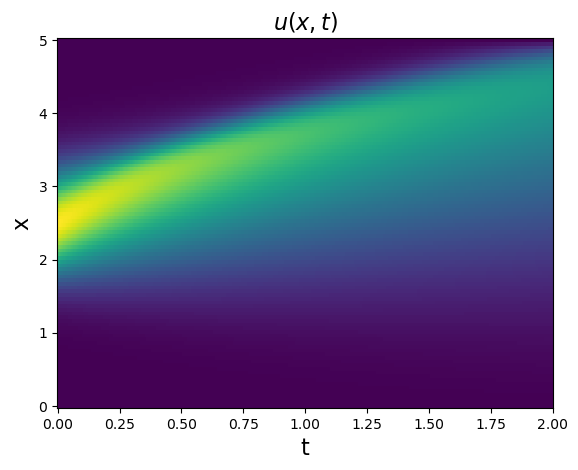

In [5]:
plt.pcolormesh(t, x, u)
plt.xlabel('t', fontsize=16)
plt.ylabel('x', fontsize=16)
plt.title(r'$u(x, t)$', fontsize=16)
plt.show()

In [6]:
library_functions = [lambda x: x, lambda x: x * x]
library_function_names = [lambda x: x, lambda x: x + x]
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=3,
    spatial_grid=x,
    is_uniform=True,
)

print('STLSQ model: ')
optimizer = ps.STLSQ(threshold=2, alpha=1e-5, normalize_columns=True)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(u, t=dt)
model.print()

STLSQ model: 


/home/smanti/mambaforge/envs/dctkit/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (2) and eliminated all coefficients
  warnings.warn(


(x0)' = 0.000
(x1)' = 0.000
(x2)' = 0.000
(x3)' = 0.000
(x4)' = 0.000
(x5)' = 0.000
(x6)' = 0.000
(x7)' = 0.000
(x8)' = 0.000
(x9)' = 0.000
(x10)' = 0.000
(x11)' = 0.000
(x12)' = 0.000
(x13)' = 0.000
(x14)' = 0.000
(x15)' = 0.000
(x16)' = 0.000
(x17)' = 0.000
(x18)' = 0.000
(x19)' = 0.000
(x20)' = 0.000
(x21)' = 0.000
(x22)' = 0.000
(x23)' = 0.000
(x24)' = 0.000
(x25)' = 0.000
(x26)' = 0.000
(x27)' = 0.000
(x28)' = 0.000
(x29)' = 0.000
(x30)' = 0.000
(x31)' = 0.000
(x32)' = 0.000
(x33)' = 0.000
(x34)' = 0.000
(x35)' = 0.000
(x36)' = 0.000
(x37)' = 0.000
(x38)' = 0.000
(x39)' = 0.000
(x40)' = 0.000
(x41)' = 0.000
(x42)' = 0.000
(x43)' = 0.000
(x44)' = 0.000
(x45)' = 0.000
(x46)' = 0.000
(x47)' = 0.000
(x48)' = 0.000
(x49)' = 0.000
(x50)' = 0.000
(x51)' = 0.000
(x52)' = 0.000
(x53)' = 0.000
(x54)' = 0.000
(x55)' = 0.000
(x56)' = 0.000
(x57)' = 0.000
(x58)' = 0.000
(x59)' = 0.000
(x60)' = 0.000
(x61)' = 0.000
(x62)' = 0.000
(x63)' = 0.000
(x64)' = 0.000
(x65)' = 0.000
(x66)' = 0.000
(x67)